# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 2: Adir 9549
# student 2: Dor 6036

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score

In [3]:
train_data = pd.read_csv('C:/Users/Acer/Desktop/matala2/titanic_train.csv')
test_data = pd.read_csv('C:/Users/Acer/Desktop/matala2/titanic_test.csv')

In [4]:
#הצגת חמשת השורות הראשונות
print("Train set:")
train_data.head()

Train set:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [5]:
#הצגת חמשת השורות הראשונות
print("Test set:")
test_data.head()

Test set:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [6]:
# סטטיסטיקות על הדאטא 
train_data.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


In [7]:
# מספר ערכים חסרים בכל עמודה
train_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [8]:
#data types
train_data.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
Survived      int64
dtype: object

In [9]:
# טוען את קובץ הנתונים 
train_data = pd.read_csv('titanic_train.csv')

# יצירת עותק נקי של הנתונים 
train_data_cleaned = train_data.copy()

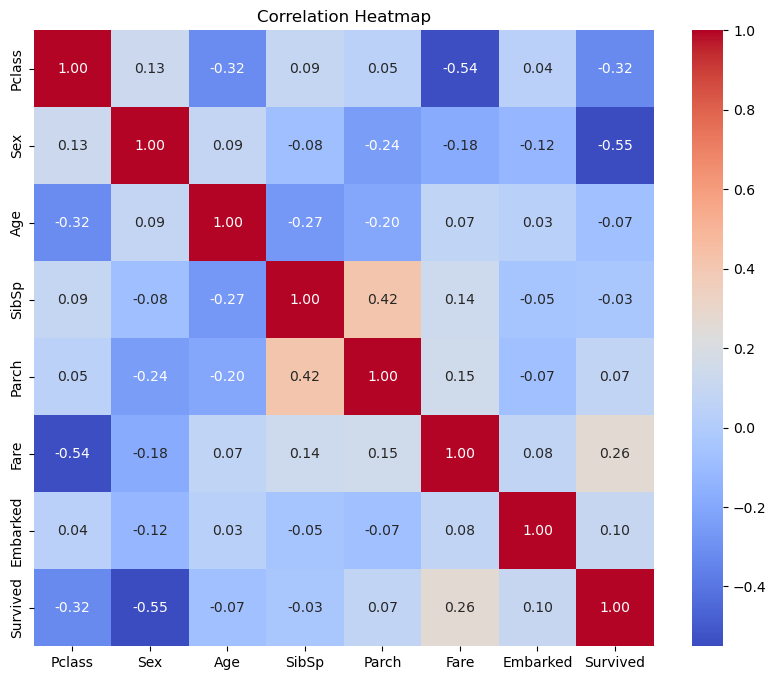

In [10]:
# יצירת מטריצת קורלציה בין התכונות
correlation_matrix = train_data_cleaned.corr()

# יצירת Heatmap עם Seaborn
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


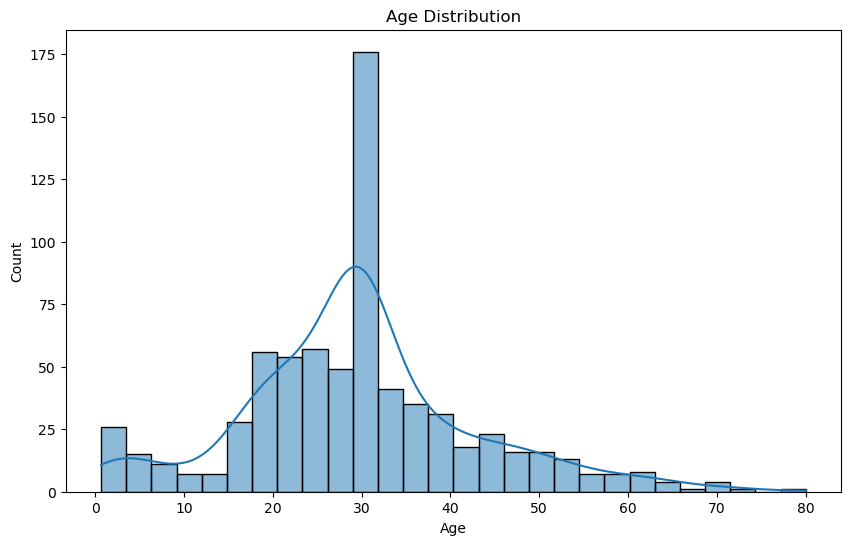

In [11]:
# גרף המציג את התפלגות הגילאים
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

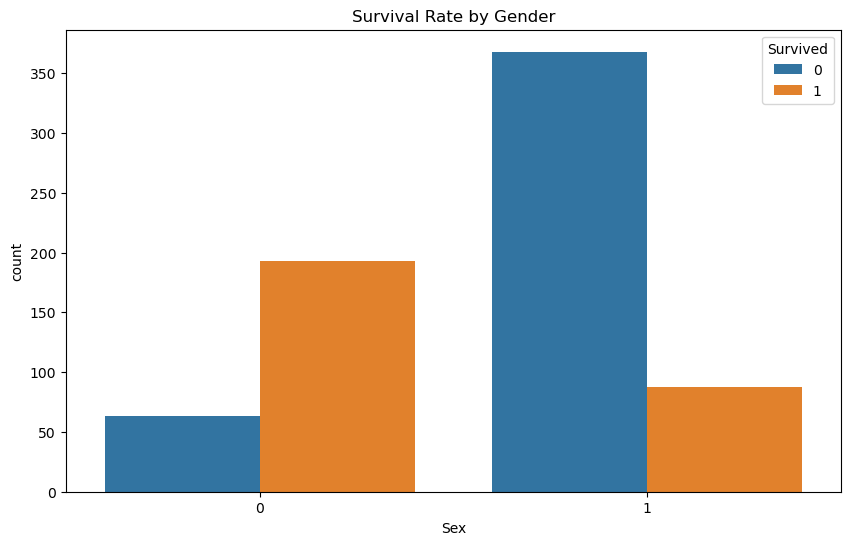

In [12]:
# (0 נשים) (1 גברים)
# גרף המציג את שיעור הניצולים לפי מין
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.show()


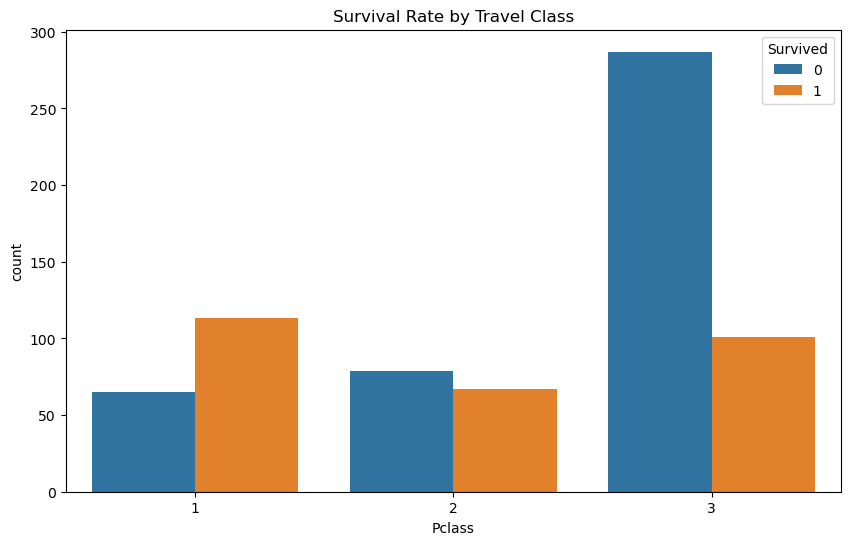

In [13]:
# גרף המציג את שיעור הניצולים לפי מחלקה
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival Rate by Travel Class')
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [14]:
# העתקת הנתונים כדי למנוע שינויים ישירות בסט הנתונים המקורי
train_data_cleaned = train_data.copy()


# הגדרת משתנה המטרה (Survived) ותכונות (features)
X = train_data_cleaned.drop(columns=['Survived'])
y = train_data_cleaned['Survived']

# חלוקת הנתונים למערכי אימון ובדיקה
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# נורמליזציה של התכונות
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [15]:
# הגדרת המודל
model_rf = RandomForestClassifier()

# הגדרת ה-hyperparameters שנרצה לנסות ב-Grid Search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# הגדרת GridSearchCV עם 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, scoring='f1_macro')

# התאמת המודל לנתונים
grid_search_rf.fit(X_train_scaled, y_train)

# שמירת התוצאה המיטבית מתוך cv_results_
best_score_rf = grid_search_rf.cv_results_['mean_test_score'][grid_search_rf.best_index_]
best_params_rf = grid_search_rf.best_params_

print(f'Best F1 Macro Score for Random Forest: {best_score_rf}')
print(f'Best Params for Random Forest: {best_params_rf}')

Best F1 Macro Score for Random Forest: 0.8168644172597128
Best Params for Random Forest: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}


In [16]:
# הגדרת המודל
model_gnb = GaussianNB()

# הגדרת ה-hyperparameters שנרצה לנסות ב-Grid Search (ל-GaussianNB יש רק את var_smoothing)
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # קביעת הערכים השונים לפרמטר var_smoothing
}

# הגדרת GridSearchCV עם 5-fold cross-validation
grid_search_gnb = GridSearchCV(estimator=model_gnb, param_grid=param_grid_gnb, cv=5, scoring='f1_macro')

# התאמת המודל לנתונים
grid_search_gnb.fit(X_train_scaled, y_train)

# שמירת התוצאה המיטבית מתוך cv_results_
best_score_gnb = grid_search_gnb.cv_results_['mean_test_score'][grid_search_gnb.best_index_]
best_params_gnb = grid_search_gnb.best_params_

print(f'Best F1 Macro Score for Gaussian Naive Bayes: {best_score_gnb}')
print(f'Best Params for Gaussian Naive Bayes: {best_params_gnb}')



Best F1 Macro Score for Gaussian Naive Bayes: 0.7754586494934872
Best Params for Gaussian Naive Bayes: {'var_smoothing': 1e-09}


In [17]:
# הגדרת המודל הלינארי
model_linear_svc = LinearSVC(max_iter=30000)

# הגדרת טווח הפרמטרים
param_grid_linear_svc = {
    'C': [0.1, 1, 10]
}

# Grid Search
grid_search_linear_svc = GridSearchCV(estimator=model_linear_svc, param_grid=param_grid_linear_svc, cv=5, scoring='f1_macro')
grid_search_linear_svc.fit(X_train_scaled, y_train)

# הצגת הפרמטרים והתוצאות הטובות ביותר
best_score_svm = grid_search_linear_svc.cv_results_['mean_test_score'][grid_search_linear_svc.best_index_]
best_params_svm = grid_search_linear_svc.best_params_


print(f'Best F1 Macro Score for LinearSVC: {best_score_svm}')
print(f'Best Params for LinearSVC: {best_params_svm}')

Best F1 Macro Score for LinearSVC: 0.7831173302859842
Best Params for LinearSVC: {'C': 0.1}


In [18]:


# יצירת טבלה מסכמת עם תוצאות המודלים Random Forest, SVM, ו-Gaussian Naive Bayes
summary_results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Gaussian Naive Bayes'],
    'Best Params': [best_params_rf, best_params_svm, best_params_gnb],
    'Best F1 Macro Score': [best_score_rf, best_score_svm, best_score_gnb]
})

# הצגת הטבלה
print(summary_results)


                  Model                                        Best Params  \
0         Random Forest  {'criterion': 'gini', 'max_depth': 20, 'min_sa...   
1                   SVM                                         {'C': 0.1}   
2  Gaussian Naive Bayes                           {'var_smoothing': 1e-09}   

   Best F1 Macro Score  
0             0.816864  
1             0.783117  
2             0.775459  


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [19]:
# אימון מחדש של Random Forest עם הפרמטרים המיטביים שמצאנו
model_rf_best = RandomForestClassifier(**best_params_rf)

# אימון המודל על כל ה-Train Set
model_rf_best.fit(X_train_scaled, y_train)

# ביצוע תחזית על סט האימון
y_train_pred_rf = model_rf_best.predict(X_train_scaled)

In [20]:
# תחזית עם Random Forest על סט האימון
y_train_pred_rf = model_rf_best.predict(X_train_scaled)
print("Random Forest Performance on Train Set:")
print(classification_report(y_train, y_train_pred_rf))

Random Forest Performance on Train Set:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       352
           1       0.92      0.83      0.87       217

    accuracy                           0.91       569
   macro avg       0.91      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



## Part 5 - Apply on test and show model performance estimation

In [21]:
# הגדרת ה-Train Set
X_train = train_data.drop(columns=['Survived'])
y_train = train_data['Survived']

# הגדרת ה-Test Set
X_test = test_data.drop(columns=['Survived'])
y_test = test_data['Survived']

# נורמליזציה של ה-Train set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# נורמליזציה של ה-Test set
X_test_scaled = scaler.transform(X_test)


In [22]:
# תחזית עם Random Forest על ה-Test Set
y_test_pred_rf = model_rf_best.predict(X_test_scaled)
print("Random Forest Performance on Test Set:")
print(classification_report(y_test, y_test_pred_rf))



# יצירת DataFrame עבור ה-Test Set
df_test = test_data.copy()

# הסרת עמודת ה-'Survived' מה-DataFrame של ה-Test Set כדי ליצור את X_test
X_test = df_test.drop(columns=['Survived'])

# תחזיות על ה-Test Set באמצעות המודל הטוב ביותר
test_predictions = model_rf_best.predict(X_test_scaled)

# הוספת עמודת התחזיות ל-DataFrame של ה-Test Set
df_test['Predicted_Survived'] = test_predictions

# הצגת 5 השורות הראשונות עם עמודת התחזיות
df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived', 'Predicted_Survived']].head()




Random Forest Performance on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       118
           1       0.79      0.75      0.77        61

    accuracy                           0.85       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Predicted_Survived
0,3,1,35.000000,0,0,7.0500,0,0,0
1,3,1,30.000000,0,0,7.2500,0,0,0
2,3,1,29.699118,0,0,14.5000,0,0,0
3,3,0,21.000000,0,0,7.7500,2,0,1
4,3,1,32.000000,0,0,56.4958,0,1,0


In [23]:
from sklearn.metrics import f1_score, accuracy_score  # הוספת accuracy_score

# חישוב F1 Macro Score עבור מודל ה-Random Forest
f1_macro_rf = round(f1_score(y_test, y_test_pred_rf, average='macro'), 3)

# חישוב Accuracy עבור מודל ה-Random Forest
accuracy_rf = round(accuracy_score(y_test, y_test_pred_rf), 3)

# הצגת התוצאות
print(f'F1 Macro Score for Random Forest on Test Set: {f1_macro_rf}')
print(f'Accuracy for Random Forest on Test Set: {accuracy_rf}')



F1 Macro Score for Random Forest on Test Set: 0.83
Accuracy for Random Forest on Test Set: 0.849
